In [1]:
import h5py
import numpy as np
import scipy
import itertools
from scipy.io import loadmat
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import confusion_matrix

import pandas as pd
import tensorflow as tf
print(tf.__version__)

from keras.models import Sequential, load_model
from tensorflow.keras.layers import Reshape, Flatten, Dense, Conv1D ,Conv2D, MaxPooling2D, MaxPooling1D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2022-03-21 16:11:22.002655: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user12/Radio/lib/:
2022-03-21 16:11:22.002687: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.7.0


In [2]:
def evaluation_tf(report, y_test, y_pred, classes):
    plt.plot(report.history['loss'], label = 'training_loss')
    plt.plot(report.history['val_loss'], label = 'validation_loss')
    plt.legend()
    plt.show()
    plt.plot(report.history['accuracy'], label = 'training_accuracy')
    plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
    plt.legend()
    plt.show()
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    plt.imshow(cm, cmap=plt.cm.Blues)
    print(cm.shape[0],cm.shape[1])
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], 'd'),
                 horizontalalignment = 'center',
                 color='black')

    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.show()

In [3]:
model = load_model("/home/user12/Documents/MODCOD_Dir/Mod_3L_4D_NLnL_tan_16S16.h5")

2022-03-21 16:11:24.068507: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user12/Radio/lib/:
2022-03-21 16:11:24.068573: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-21 16:11:24.068598: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ipt-Precision-7920-Tower): /proc/driver/nvidia/version does not exist
2022-03-21 16:11:24.068973: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
filename = "/home/user12/Saad_External/MODCOD_DataSet/MOD_DATASET/MOD_Rician0p7fadded_16Samp_N_NN1.h5"
f = h5py.File(filename, 'r')
a_group_key = list(f.keys())
print (a_group_key)


['DATA', 'DATATYPE', 'SNR']


In [5]:
data = np.array(f[a_group_key[0]])            #(600000, 256, 4)
datatype = np.array(f[a_group_key[1]])         #(600000, 1)
SNR = np.array(f[a_group_key[2]])               #(600000, 1)

print(data.shape)
print(datatype.shape)
print(SNR.shape)

(600000, 256, 4)
(600000, 1)
(600000, 1)


In [6]:
print(type(data)) 
print(type(datatype))
print(type(SNR))

print(data.shape)
print(datatype.shape)
print(SNR.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(600000, 256, 4)
(600000, 1)
(600000, 1)


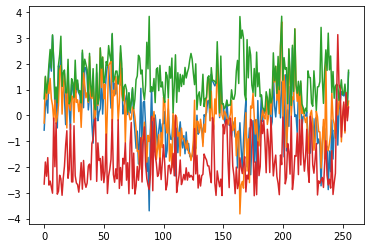

[-0.57200387  0.35527571  0.61271802  0.08728794  1.80297813  2.11721493
  1.71321365  3.09761209  2.09863821  0.2657548   1.0525087  -0.48722173
  1.92046641  1.60504517  2.38640002  1.12446076  1.24981301  0.6854025
 -0.35732168  0.72272544  1.65536919  0.22044162 -0.54855668  1.19992101
  1.07228786  0.64638871  1.48506296  0.87304152  1.22839527  0.86838476
  0.76193306 -0.12378694  2.42783147  0.29730543  1.84752594  1.84964733
  1.54686464  0.21123202  0.74961947  0.93590609 -0.34044211 -1.07457503
  0.44495178 -0.21912614  1.64961225 -0.2089871   0.12356189  0.26140514
  1.47740412  0.05106185  1.08387518  0.84291524  1.56143364  1.92789253
  1.90264844  1.14040044  0.28191898  3.13467786  0.85502346  1.24361494
  0.82423372  1.33499123  1.21392412  1.52594236  1.17403362  1.82497246
  0.05365485  0.34489445  0.57779083  0.79620312  0.03170961  0.86923523
  0.08973655  0.5179008   1.02186502 -0.0273091  -0.61323468 -1.27573025
 -0.60976587 -1.88554383 -0.75373079  1.04687784 -1.

In [7]:
point = 800
plt.plot(data[point,:,0])
plt.plot(data[point,:,1])
plt.plot(data[point,:,2])
plt.plot(data[point,:,3])

plt.show()

print(data[point,:,0])
print(datatype[point])
print(SNR[point])

# 0--BPSK , 1--QPSK , 2--PSK8 , 3--PSK16, 4--QAM16 , 5--QAM32
# [-4:2:14]

In [8]:
#data = f[a_group_key[0]]              #(600000, 256, 4)
#datatype = f[a_group_key[1]]          #(600000, 1)
#SNR = f[a_group_key[2]]               #(600000, 1)


#print(data.shape)
#print(datatype.shape)
#print(SNR.shape)

# Six different Modulation each with 100000 in length
# SNR... 10 bins for each modulation

# Result should be list of pair--- (16 symbols packet--- 256, Modulation Scheme (0...5))

# Write into pre-processed training data!

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, datatype, test_size = 0.2)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
                
                

(480000, 256, 4)
(120000, 256, 4)
(480000, 1)
(120000, 1)


In [11]:
report = model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
15000/15000 [==============================] - 265s 18ms/step - loss: 0.3942 - accuracy: 0.8542 - val_loss: 0.3243 - val_accuracy: 0.8716
Epoch 2/20
15000/15000 [==============================] - 253s 17ms/step - loss: 0.3082 - accuracy: 0.8756 - val_loss: 0.2399 - val_accuracy: 0.8972
Epoch 3/20
15000/15000 [==============================] - 254s 17ms/step - loss: 0.2854 - accuracy: 0.8863 - val_loss: 0.2375 - val_accuracy: 0.9030
Epoch 4/20
15000/15000 [==============================] - 251s 17ms/step - loss: 0.2735 - accuracy: 0.8911 - val_loss: 0.2543 - val_accuracy: 0.8965
Epoch 5/20
15000/15000 [==============================] - 252s 17ms/step - loss: 0.2656 - accuracy: 0.8942 - val_loss: 0.2150 - val_accuracy: 0.9140
Epoch 6/20
15000/15000 [==============================] - 256s 17ms/step - loss: 0.2608 - accuracy: 0.8956 - val_loss: 0.2292 - val_accuracy: 0.9045
Epoch 7/20
15000/15000 [==============================] - 258s 17ms/step - loss: 0.2575 - accuracy: 0.8970

In [12]:
model.save('Mod_3L_4D_16S16_TF_NLnL_0p7ricianfadded_N.h5')

In [13]:
y_pred = model.predict(X_test).argmax(axis = 1)

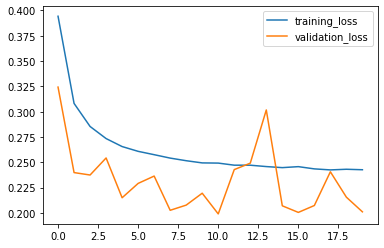

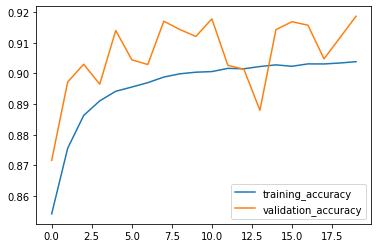

6 6


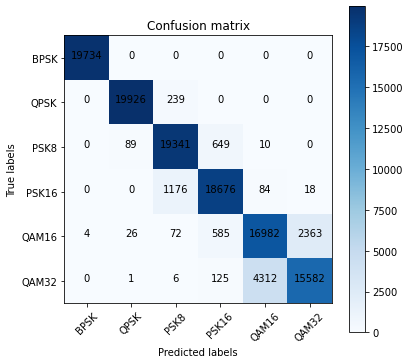

In [14]:
# 0--BPSK , 1--QPSK , 2--PSK8 , 3--PSK16, 4--QAM16 , 5--QAM32
Y = ['BPSK','QPSK','PSK8','PSK16','QAM16','QAM32']
evaluation_tf(report, y_test, y_pred, Y)